In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%load_ext rpy2.ipython

import ipyparallel as ipp
import matplotlib.pyplot as plt
import msprime
import numpy as np
import pandas as pd
import PIED
import toytree

from collections import Counter
from IPython.display import display, SVG

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

## Try to dev the full coalescent model

In [5]:
sim = PIED.Core("sims")
#_ = sim.get_params(verbose=True)
sim.set_param("ntaxa", 10)
tre, res = sim._simulate()
tre.draw(node_labels=True)

1.9443111111111688
0.053733333333333334
0.019733333333333335
0.05302222222222217
0.0072000000000000015
0.026133333333333324
0.004933333333333334
0.037333333333333336
0.053111111111111046
0.05417777777777778


(<toyplot.canvas.Canvas at 0x7f6ee1e31cc0>,
 <toyplot.coordinates.Cartesian at 0x7f6ee1e2aef0>)

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t3aeb104d227d4da7a589ab59c4edbc55" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 260.0 275.0" width="260.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 idx: 0
name: r0
dist: 0.7364
support: 0
lambda_: 1.0277
trait: -0.4411
abundance: 41565
r: 0.0005
height: 0.0000 0 idx: 1
name: r1
dist: 0.1646
support: 0
lambda_: 0.9864
trait: 0.2769
abundance: 1146
r: 0.0009
height: 0.0000 1 idx: 2
name: r2
dist: 0.1646
support: 0
lambda_: 0.9909
trait: 0.0695
abundance: 1359
r: 0.0001
height: 0.0000 2 idx: 3
name: r3
dist: 0.4055
support: 0
lambda_: 0.9817
trait: 0.0391
abundance: 2087
r: -0.0014
height: 0.0000 3 idx: 4
name: r4
dist: 0.1214
support: 0
lambda_: 0.9628
trait: -0.4964
abundance: 410
r: 0.0002
height: 0.0000 4 idx: 5
name: r5
dist: 0.1214
support: 0
lambda_: 0.9917
trait: -0.1818
abundance: 330
r: -0.0030
height: 0.0000 5 idx: 6
name: r6
dist: 0.9114
support: 0
lambda_: 1.0302
trait: -0.3916
abundance: 195
r: 0.0056
height: 0.0000 6 idx: 7
name: r7
dist: 0.9114
support: 0
lambda_: 1.0588
trait: -1.3578
abundance: 525
r: -0.0006
height: 0.0000 7 idx: 8
name: r8
dist: 0.3320
support: 0
lambda_: 1.0320
trait: 0.3013
abundance: 522
r: -0.0004
height: 0.0000 8 idx: 9
name: r9
dist: 0.3320
support: 0
lambda_: 1.0098
trait: 0.8745
abundance: 1684
r: 0.0021
height: 0.0000 9 idx: 10
name: 1.24680539819907832
dist: 0.2409
support: 0
lambda_: 1.0110
trait: -0.0836
abundance: 2525
r: -0.0001
height: 0.1646 10 idx: 11
name: 1.17332592191824642
dist: 0.2200
support: 0
lambda_: 1.0240
trait: -0.1576
abundance: 4607
r: -0.0012
height: 0.4055 11 idx: 12
name: 1.17332592191824641
dist: 0.5041
support: 0
lambda_: 0.9993
trait: -0.0340
abundance: 744
r: 0.0034
height: 0.1214 12 idx: 13
name: 0.95330596062911211
dist: 0.1109
support: 0
lambda_: 1.0028
trait: -0.1781
abundance: 5376
r: -0.0007
height: 0.6255 13 idx: 14
name: 0.66743606445372322
dist: 0.4092
support: 0
lambda_: 0.9647
trait: -1.7897
abundance: 724
r: -0.0012
height: 0.9114 14 idx: 15
name: 0.66743606445372321
dist: 0.9886
support: 0
lambda_: 1.0430
trait: 2.3557
abundance: 2200
r: -0.0025
height: 0.3320 15 idx: 16
name: 0.258196351752346952
dist: 0.8424
support: 0
lambda_: 0.9784
trait: -0.6725
abundance: 46630
r: 0.0035
height: 0.7364 16 idx: 17
name: 0.258196351752346951
dist: 0.2582
support: 0
lambda_: 0.9700
trait: -0.2361
abundance: 2819
r: 0.0004
height: 1.3206 17 idx: 18
name: 0
dist: 1.0000
support: 0
lambda_: 1.0000
trait: 0.0000
abundance: 50000
r: 0.0000
height: 1.5788 18

In [331]:
generation_time = 1
population_configurations = []
demographic_events = []
msp_idx = 0
for i, node in enumerate(tree.treenode.traverse("postorder")):
    children = node.get_descendants()
    if len(children) == 0:
        pop = msprime.PopulationConfiguration(sample_size=5, initial_size=node.abundance)
        population_configurations.append(pop)
        node.add_feature("msprime_idx", msp_idx)
        print("I'm a tip {} - {}".format(node.idx, node.msprime_idx))
        msp_idx += 1
    else:
        chidx = [c.msprime_idx for c in children]
        gens = node.height * 1e6 / generation_time
        mig = msprime.MassMigration(time=gens, source=chidx[0], dest=chidx[1])
        demographic_events.append(mig)
        node.add_feature("msprime_idx", chidx[1])
        print("I'm a node {} ({}) [gens {}]- {}".format(node.idx, node.msprime_idx, gens,
                                                        " ".join(map(lambda x: str(x), chidx))))
        

I'm a tip 9 - 0
I'm a tip 8 - 1
I'm a tip 7 - 2
I'm a node 11 (2) [gens 231573.03737177327]- 1 2
I'm a tip 6 - 3
I'm a tip 5 - 4
I'm a node 10 (4) [gens 316028.4573931016]- 3 4
I'm a node 13 (4) [gens 319241.3099754927]- 2 4 1 2 3 4
I'm a tip 4 - 5
I'm a tip 3 - 6
I'm a node 12 (6) [gens 217820.83778164952]- 5 6
I'm a node 14 (6) [gens 650271.4154595846]- 4 6 2 4 5 6 1 2 3 4
I'm a node 16 (6) [gens 967035.994712961]- 0 6 4 6 2 4 5 6 1 2 3 4
I'm a tip 2 - 7
I'm a tip 1 - 8
I'm a node 15 (8) [gens 590786.9855288728]- 7 8
I'm a node 17 (8) [gens 1155163.7750729537]- 6 8 0 6 7 8 4 6 2 4 5 6 1 2 3 4
I'm a tip 0 - 9
I'm a node 18 (9) [gens 2312979.075649877]- 8 9 6 8 0 6 7 8 4 6 2 4 5 6 1 2 3 4


In [332]:
demographic_events = sorted(demographic_events, key=lambda x: x.time)
dd = msprime.DemographyDebugger(
    population_configurations=population_configurations,
    demographic_events=demographic_events)
dd.print_history()

Model =  hudson(reference_size=1)
Epoch: 0 -- 217820.83778164952 generations
     start     end      growth_rate |     0        1        2        3        4        5        6        7        8        9    
   -------- --------       -------- | -------- -------- -------- -------- -------- -------- -------- -------- -------- -------- 
0 |6.34e+03 6.34e+03              0 |     0        0        0        0        0        0        0        0        0        0    
1 |   42       42                 0 |     0        0        0        0        0        0        0        0        0        0    
2 |   17       17                 0 |     0        0        0        0        0        0        0        0        0        0    
3 |   32       32                 0 |     0        0        0        0        0        0        0        0        0        0    
4 |    2        2                 0 |     0        0        0        0        0        0        0        0        0        0    
5 |2.58e+03 2.58e+03

In [333]:
ts = msprime.simulate(
    population_configurations=population_configurations,
    demographic_events=demographic_events,
    length=1000,
    mutation_rate=1e-7)
population_configurations

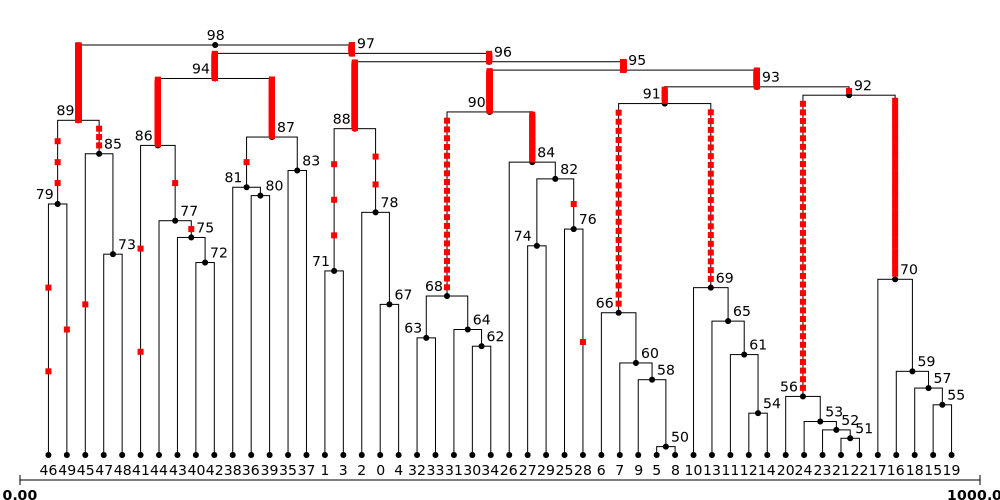

In [354]:
# tree_height_scale also takes "log_time"
display(SVG(ts.draw_svg(size=(1000, 500), tree_height_scale="rank", mutation_labels={})))

In [400]:
pop_inds = {}
for pop in ts.populations():
    #pop_inds[pop.id] = [x for x in ts.samples() if ts.node(x).population == pop.id]
    pop_inds[pop.id] = ts.samples(pop.id)
pis = ts.diversity(list(pop_inds.values()))
pis

array([0.003 , 0.    , 0.    , 0.    , 0.    , 0.001 , 0.    , 0.0006,
       0.0018, 0.0052])

In [398]:
for pi, leaf in zip(pis, tree.treenode.get_leaves()):
    #print(leaf.idx)
    print(leaf.msprime_idx)
    leaf.pi = pi
for leaf in tree.treenode.get_leaves():
    print(leaf.pi)

0
1
2
3
4
5
6
7
8
9
0.003
0.0
0.0
0.0
0.0
0.001
0.0
0.0006
0.0017999999999999997
0.0052


In [24]:
ts, tn = PIED.PIED.nucleotide_diversity_ILS(tree.paramsdict, tre.treenode)
pis = [x.pi for x in tn.get_leaves()]
print(pis)

[0.0032, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014, 0.0, 0.0016, 0.001]


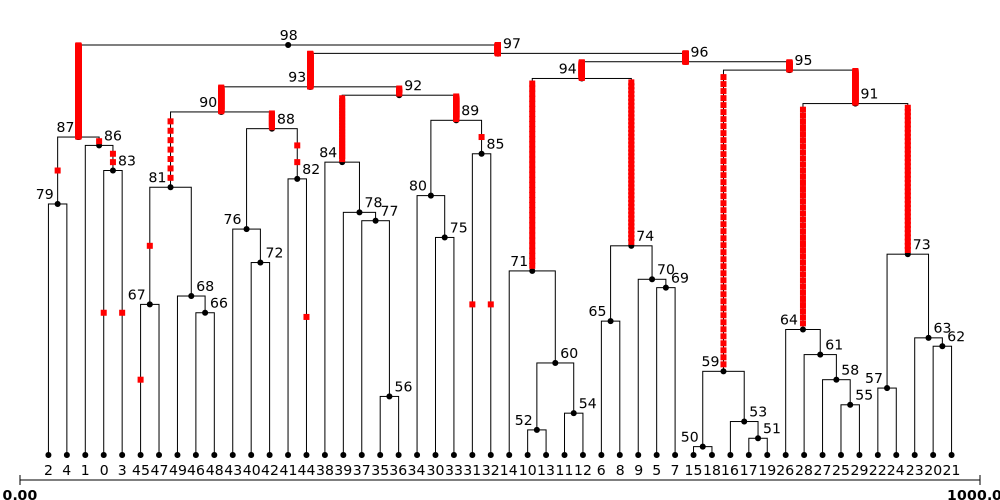

In [25]:
display(SVG(ts.draw_svg(size=(1000, 500), tree_height_scale="rank", mutation_labels={})))